In [82]:
%run 0-Base.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
NUM_MONTH_LAGS = 16
NUM_FEATURES   = 35

SOURCE_PATH = f"{DATA_PATH}/2-feature-engineered"
TARGET_PATH = f"{DATA_PATH}/3-scaled"

In [84]:
%time aggregated_transactions_df = pd.read_feather(f"{SOURCE_PATH}/aggregated-transactions-by-card-id.feather")

CPU times: user 295 ms, sys: 156 ms, total: 451 ms
Wall time: 182 ms


In [85]:
aggregated_transactions_df.isnull().sum()

card_id                                      0
month_lag                                    0
count                                        0
authorized_flag_mean                         0
purchase_year_first                          0
purchase_month_first                         0
purchase_amount_min                          0
purchase_amount_mean                         0
purchase_amount_max                          0
authorized_purchase_amount_min           45634
authorized_purchase_amount_mean          45634
authorized_purchase_amount_max           45634
not_authorized_purchase_amount_min     2073231
not_authorized_purchase_amount_mean    2073231
not_authorized_purchase_amount_max     2073231
installments_-1_mean                         0
installments_0_mean                          0
installments_1_mean                          0
installments_2_mean                          0
installments_3_mean                          0
installments_4_mean                          0
installments_

In [86]:
%%time

columns = [
    "authorized_purchase_amount_min",
    "authorized_purchase_amount_mean",
    "authorized_purchase_amount_max",
    "not_authorized_purchase_amount_min",
    "not_authorized_purchase_amount_mean",
    "not_authorized_purchase_amount_max",
]

for column in columns:
    aggregated_transactions_df[f"{column}_missing"] = \
        aggregated_transactions_df[column].isnull()
    
    aggregated_transactions_df[column].fillna(
        aggregated_transactions_df[column].mean(),
        inplace=True
    )

CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 122 ms


In [87]:
%time aggregated_transactions_df = aggregated_transactions_df[sorted(aggregated_transactions_df.columns)]

CPU times: user 71.6 ms, sys: 42.6 ms, total: 114 ms
Wall time: 114 ms


In [88]:
aggregated_transactions_df.isnull().sum()

authorized_flag_mean                           0
authorized_purchase_amount_max                 0
authorized_purchase_amount_max_missing         0
authorized_purchase_amount_mean                0
authorized_purchase_amount_mean_missing        0
authorized_purchase_amount_min                 0
authorized_purchase_amount_min_missing         0
card_id                                        0
count                                          0
installments_-1_mean                           0
installments_0_mean                            0
installments_10_mean                           0
installments_11_mean                           0
installments_12_mean                           0
installments_1_mean                            0
installments_2_mean                            0
installments_3_mean                            0
installments_4_mean                            0
installments_5_mean                            0
installments_6_mean                            0
installments_7_mean 

In [89]:
scaled_features = set()

In [90]:
%%time

from sklearn.preprocessing import StandardScaler

features = [
    "purchase_amount_min",
    "purchase_amount_mean",
    "purchase_amount_max",
    
    "authorized_purchase_amount_min",
    "authorized_purchase_amount_mean",
    "authorized_purchase_amount_max",

    "not_authorized_purchase_amount_min",
    "not_authorized_purchase_amount_mean",
    "not_authorized_purchase_amount_max",
]

df = aggregated_transactions_df[features]

df += np.abs(df.min())
df = np.log(df, where=df!=0)
df = StandardScaler().fit_transform(df)
aggregated_transactions_df[features] = df

scaled_features |= set(features)

CPU times: user 2.92 s, sys: 668 ms, total: 3.59 s
Wall time: 3.57 s


In [91]:
%%time

from sklearn.preprocessing import StandardScaler

features = ["count"]

df = aggregated_transactions_df[features]

df = np.log(df)
df = StandardScaler().fit_transform(df)
aggregated_transactions_df[features] = df

scaled_features |= set(features)

CPU times: user 317 ms, sys: 82.8 ms, total: 400 ms
Wall time: 401 ms


In [92]:
%%time

from sklearn.preprocessing import MinMaxScaler

features = [
    "purchase_month_first",
    "purchase_year_first",
    "season",
]

df = aggregated_transactions_df[features]
df = MinMaxScaler((-1, 1)).fit_transform(df)
aggregated_transactions_df[features] = df

scaled_features |= set(features)

CPU times: user 777 ms, sys: 160 ms, total: 936 ms
Wall time: 938 ms


In [93]:
set(aggregated_transactions_df.columns) - scaled_features

{'authorized_flag_mean',
 'authorized_purchase_amount_max_missing',
 'authorized_purchase_amount_mean_missing',
 'authorized_purchase_amount_min_missing',
 'card_id',
 'installments_-1_mean',
 'installments_0_mean',
 'installments_10_mean',
 'installments_11_mean',
 'installments_12_mean',
 'installments_1_mean',
 'installments_2_mean',
 'installments_3_mean',
 'installments_4_mean',
 'installments_5_mean',
 'installments_6_mean',
 'installments_7_mean',
 'installments_8_mean',
 'installments_999_mean',
 'installments_9_mean',
 'month_lag',
 'not_authorized_purchase_amount_max_missing',
 'not_authorized_purchase_amount_mean_missing',
 'not_authorized_purchase_amount_min_missing'}

In [94]:
aggregated_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044128 entries, 0 to 3044127
Data columns (total 37 columns):
authorized_flag_mean                           float32
authorized_purchase_amount_max                 float64
authorized_purchase_amount_max_missing         bool
authorized_purchase_amount_mean                float64
authorized_purchase_amount_mean_missing        bool
authorized_purchase_amount_min                 float64
authorized_purchase_amount_min_missing         bool
card_id                                        object
count                                          float64
installments_-1_mean                           float32
installments_0_mean                            float32
installments_10_mean                           float32
installments_11_mean                           float32
installments_12_mean                           float32
installments_1_mean                            float32
installments_2_mean                            float32
installments_3_me

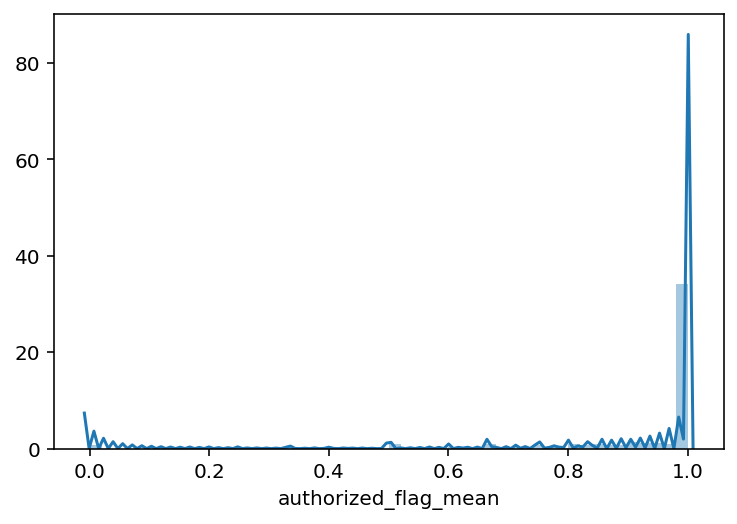

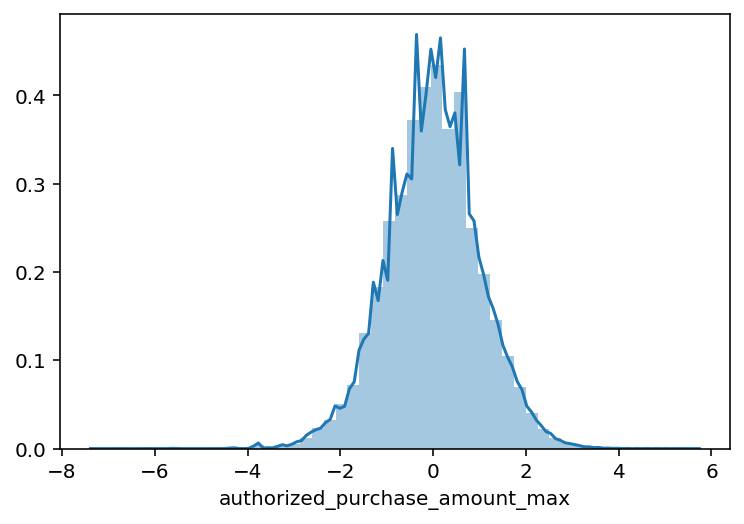

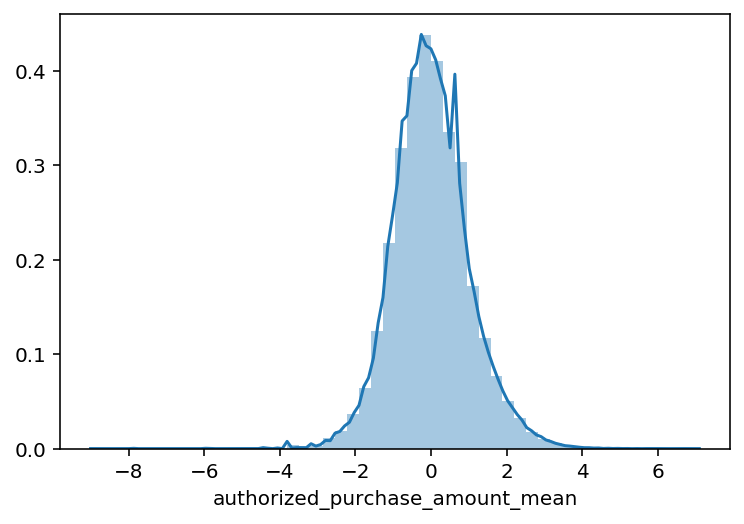

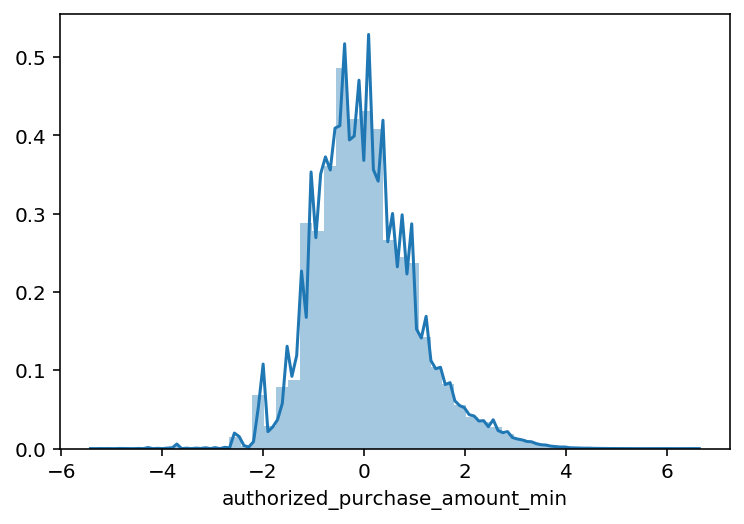

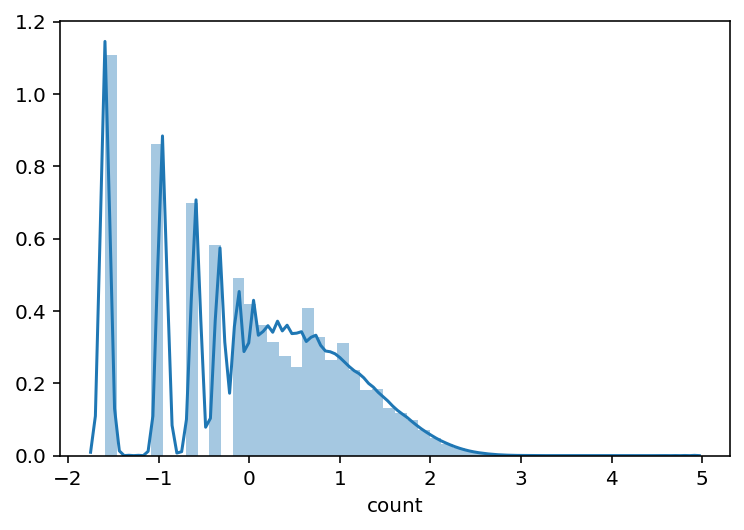

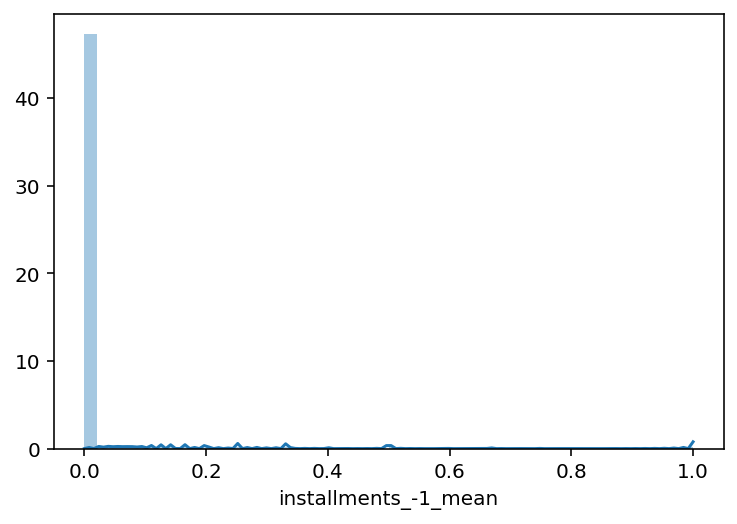

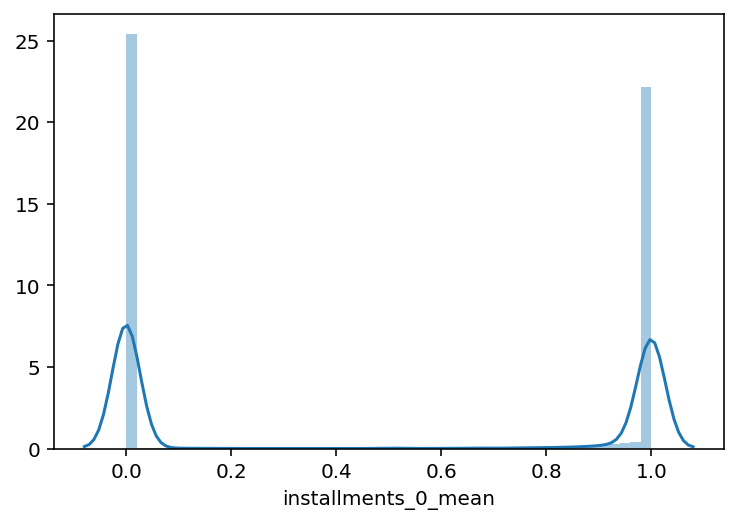

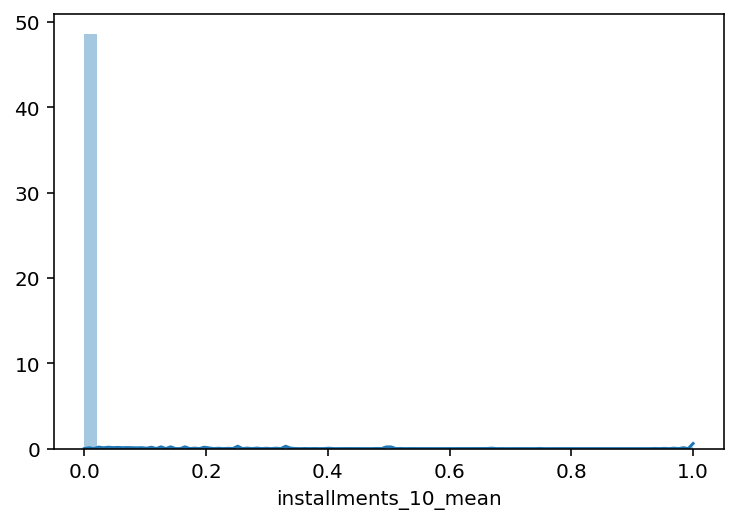

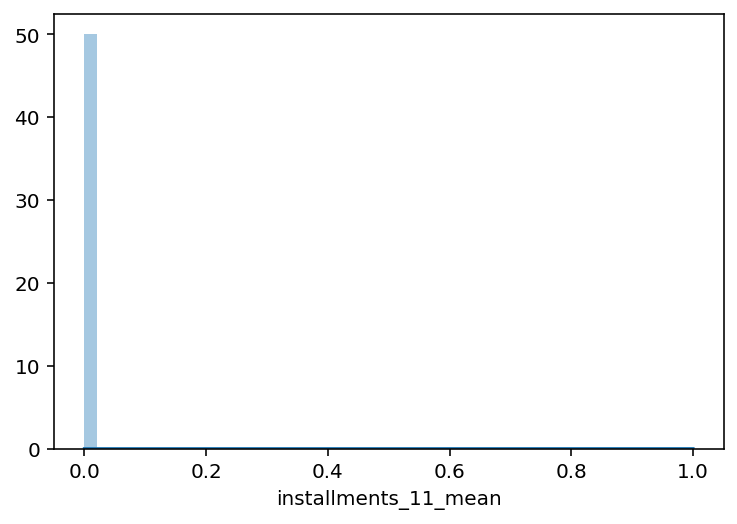

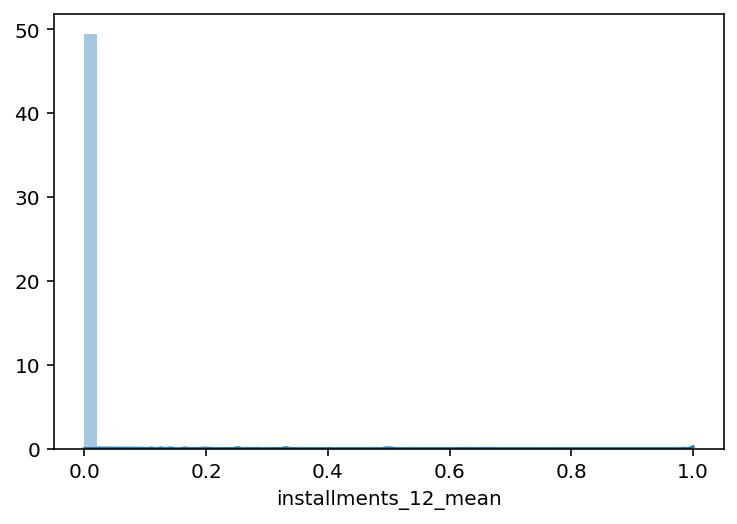

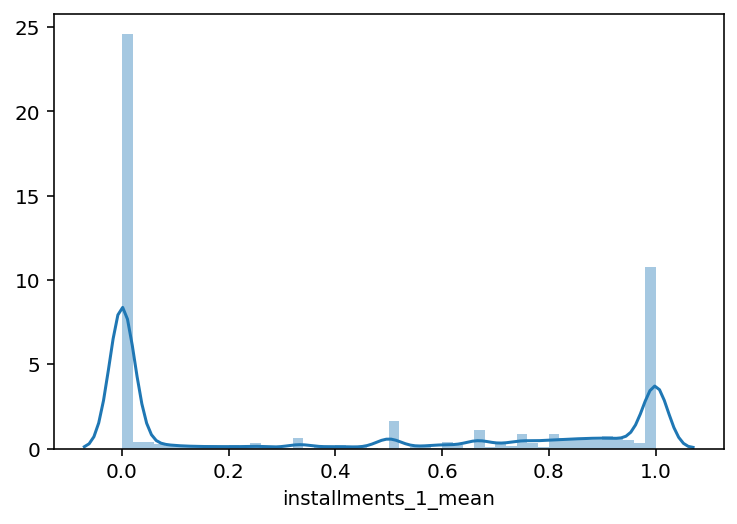

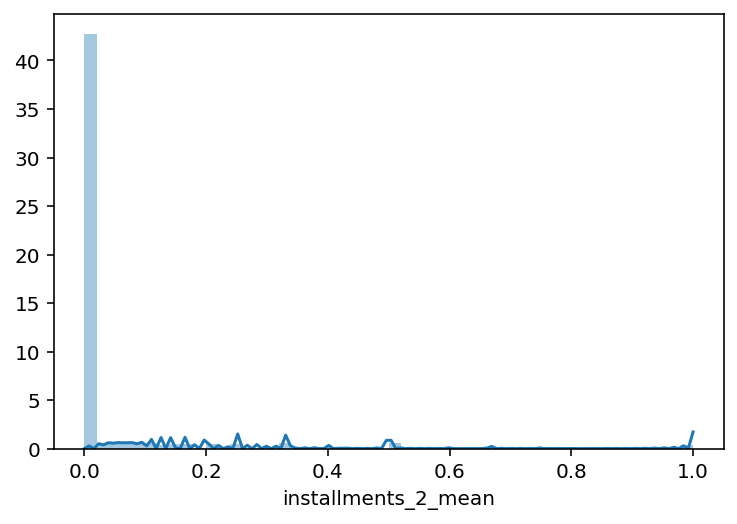

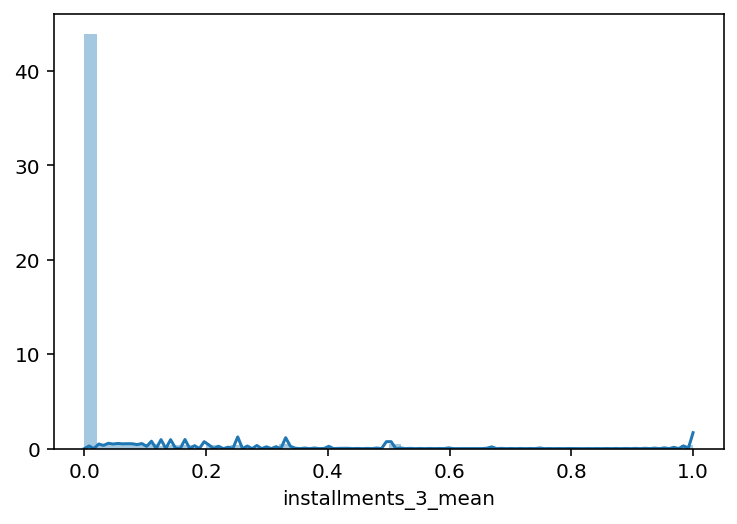

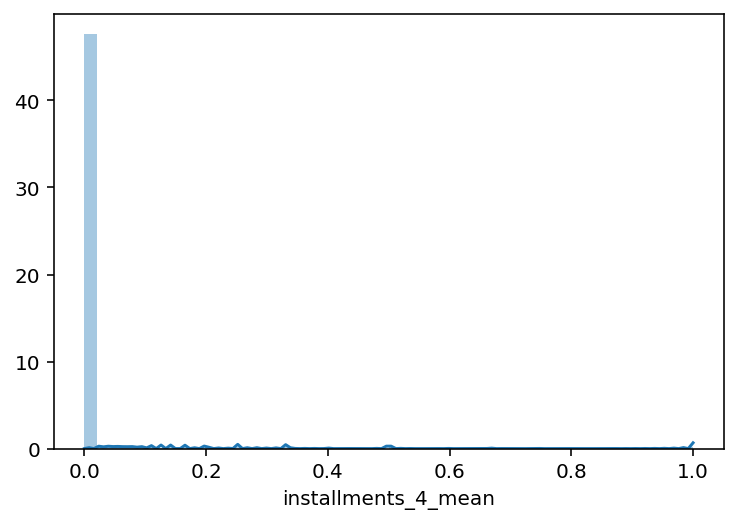

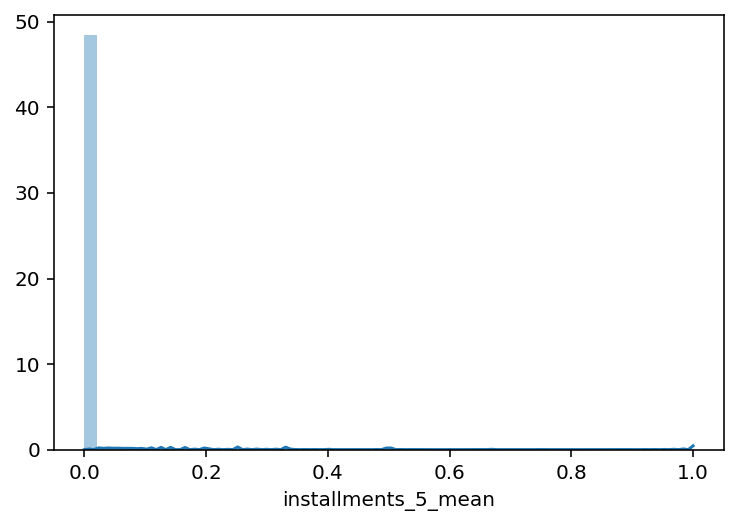

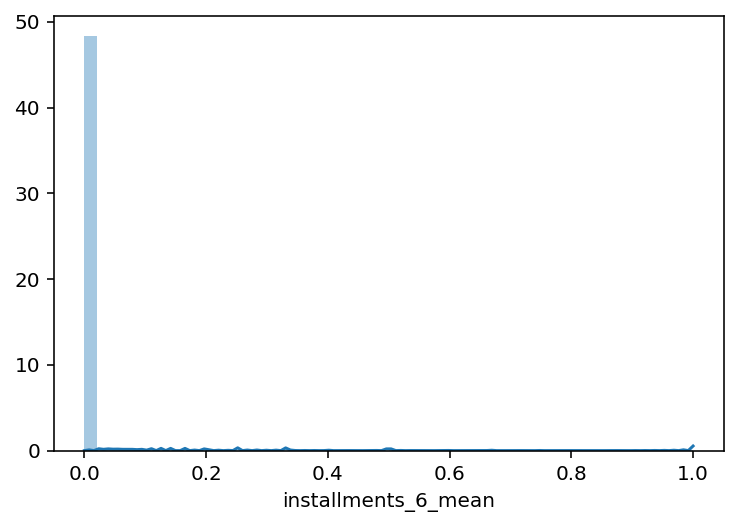

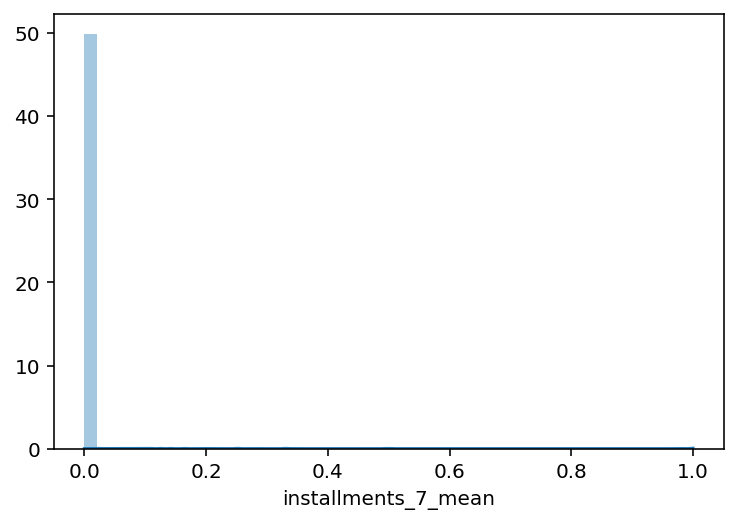

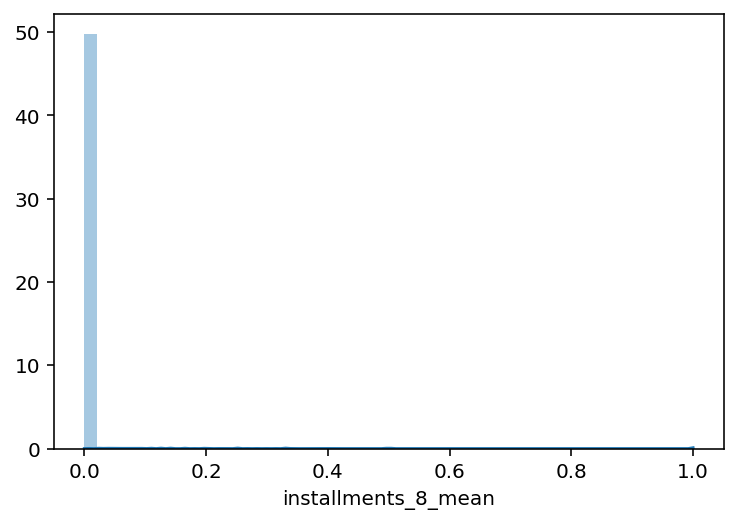

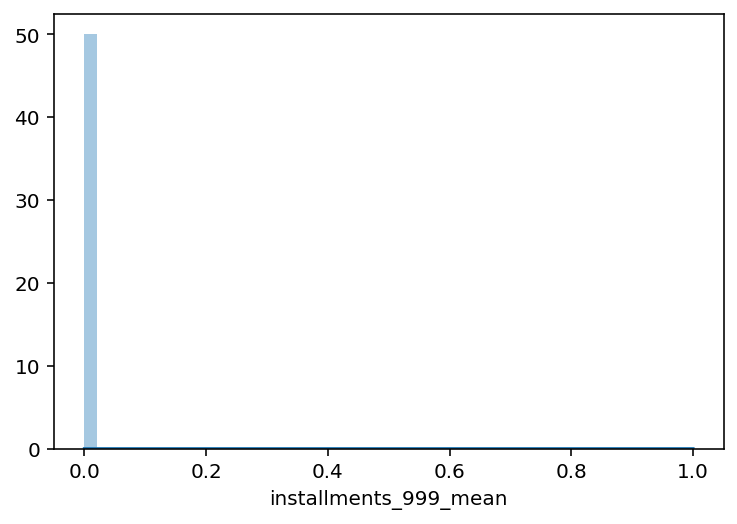

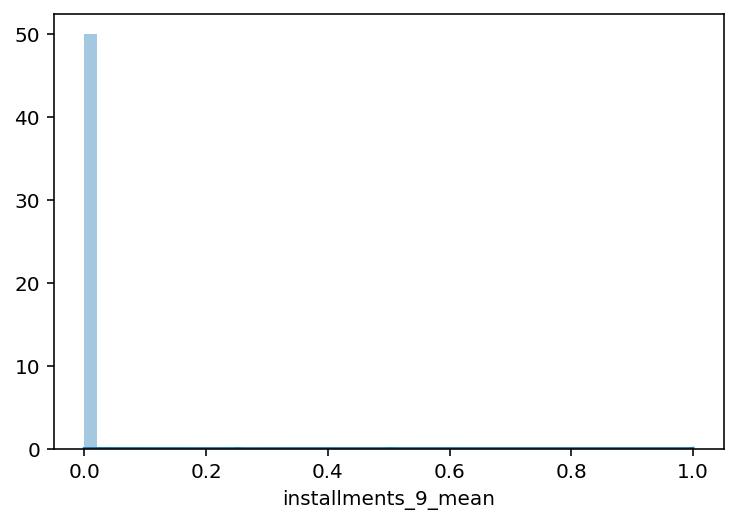

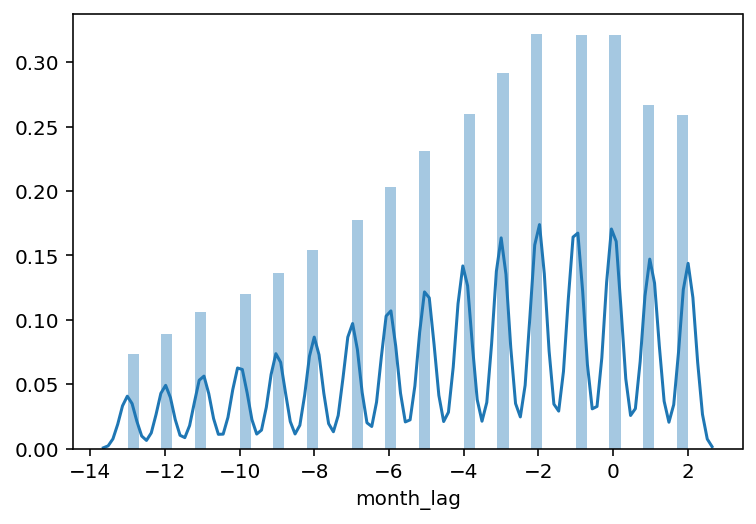

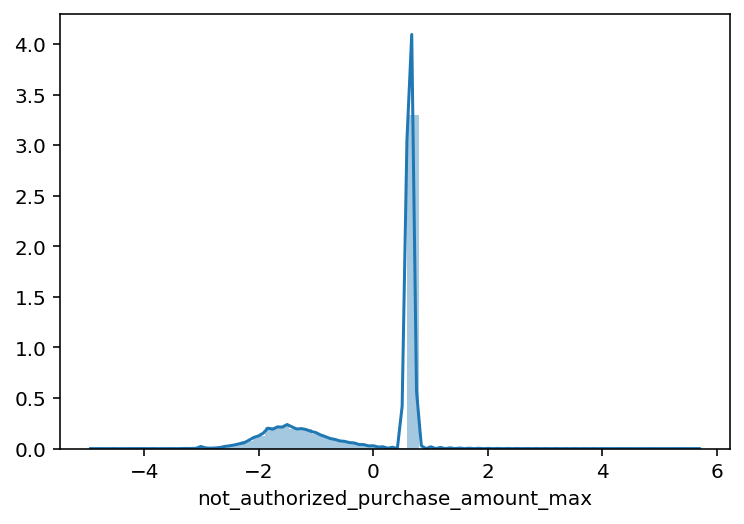

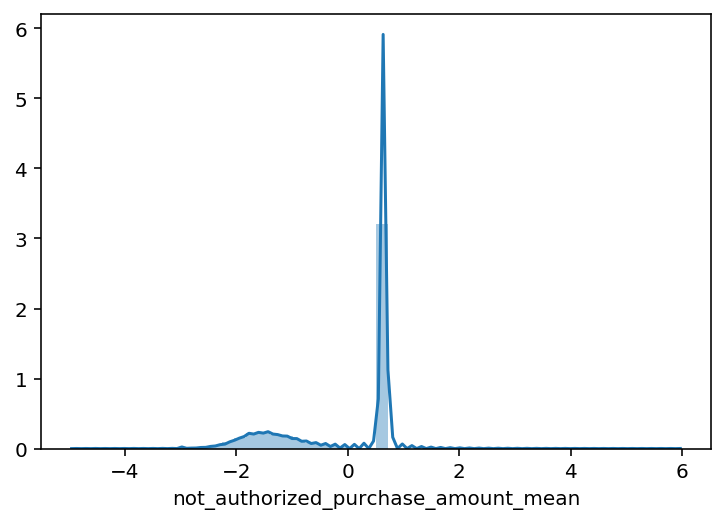

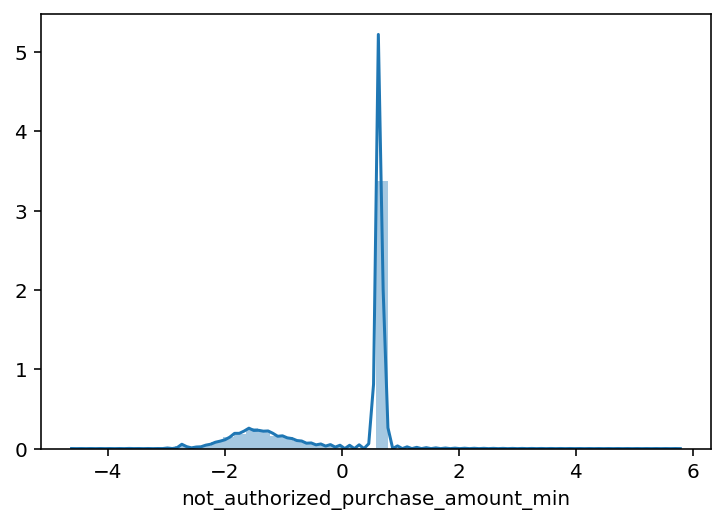

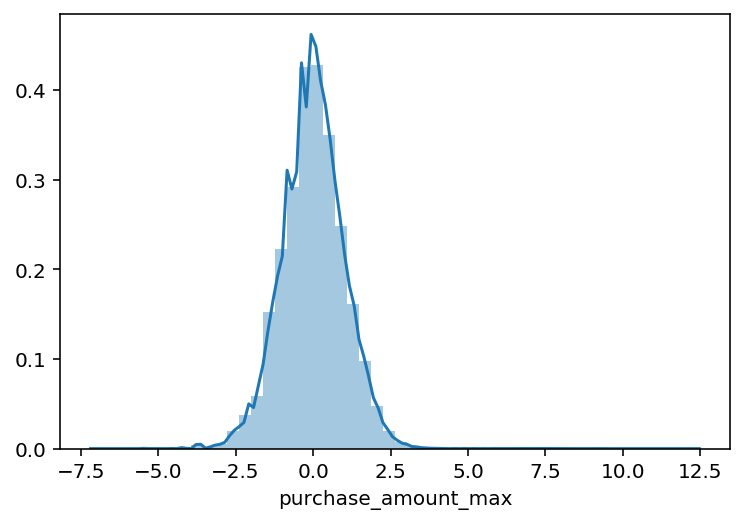

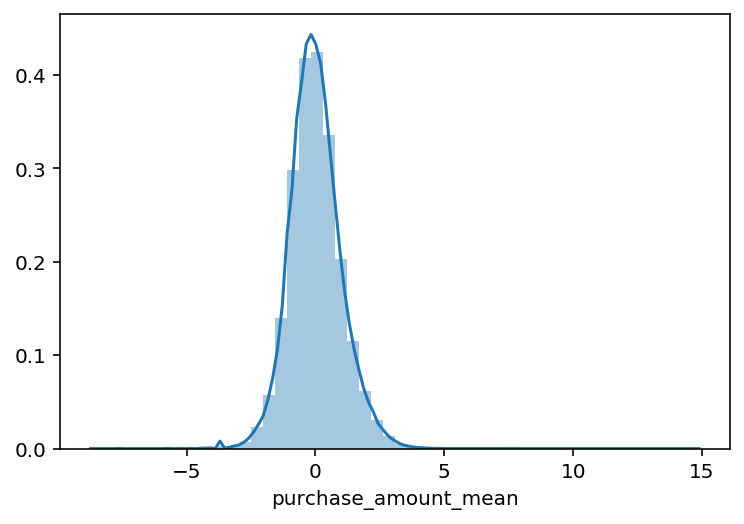

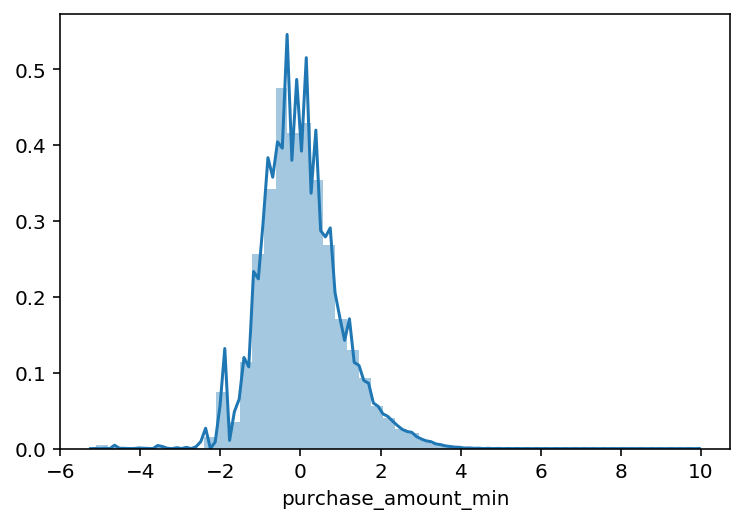

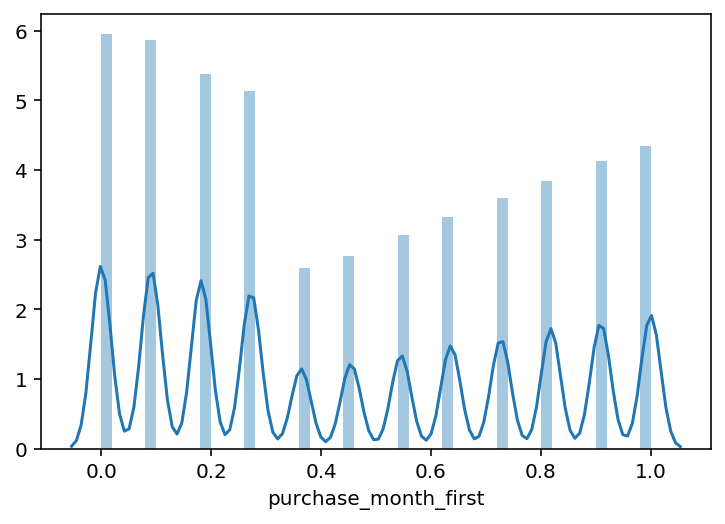

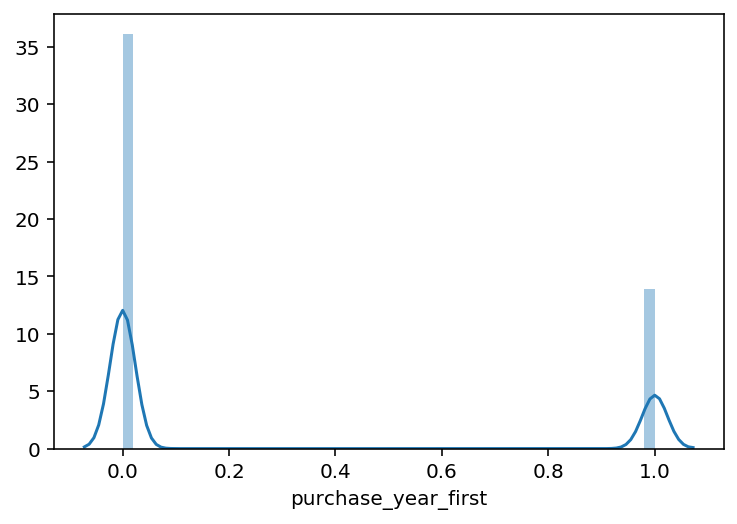

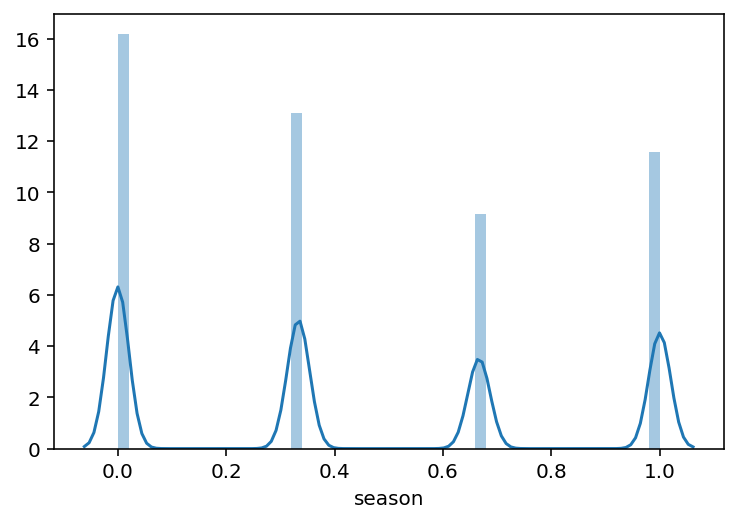

In [95]:
non_visualizable_features = {
    "authorized_purchase_amount_max_missing",
    "authorized_purchase_amount_mean_missing",
    "authorized_purchase_amount_min_missing",
    
    "card_id",
    
    "not_authorized_purchase_amount_max_missing",
    "not_authorized_purchase_amount_mean_missing",
    "not_authorized_purchase_amount_min_missing",
}

visualizable_features = set(aggregated_transactions_df.columns) - non_visualizable_features

for feature in sorted(visualizable_features):
    sns.distplot(aggregated_transactions_df[feature])
    
    plt.show()

In [96]:
train_df = pd.read_feather(f"{SOURCE_PATH}/train.feather")
test_df = pd.read_feather(f"{SOURCE_PATH}/test.feather")

card_owners_df = pd.concat(
    [
        train_df,
        test_df,
    ],
    ignore_index=True,
    copy=False,
    sort=False,
)

%time card_owners_df.set_index("card_id", inplace=True)

display(card_owners_df)

CPU times: user 5.03 ms, sys: 0 ns, total: 5.03 ms
Wall time: 5.1 ms


,first_active_month,feature_1,feature_2,feature_3,target
card_id,,,,,
C_ID_92a2005557,2017-06-01,5,2,1,-0.820283
C_ID_3d0044924f,2017-01-01,4,1,0,0.392913
C_ID_d639edf6cd,2016-08-01,2,2,0,0.688056
C_ID_186d6a6901,2017-09-01,4,3,0,0.142495
C_ID_cdbd2c0db2,2017-11-01,1,3,0,-0.159749
...,...,...,...,...,...
C_ID_7a239d2eda,2017-10-01,2,2,0,NaN
C_ID_75ace375ae,2017-09-01,3,1,1,NaN
C_ID_21d56d950c,2016-09-01,5,1,1,NaN


In [99]:
def process_customer_transactions_df(df):
    X = -10 * np.ones((NUM_MONTH_LAGS, NUM_FEATURES))
    X[df.month_lag + 13] = df.drop(columns=["card_id", "month_lag"]).values
    X[np.isnan(X)] = -10
    return X

def process_transactions(df):
    X, y = [], []

    for card_id, customer_transactions_df in df.groupby("card_id"):
        X.append(process_customer_transactions_df(customer_transactions_df))
        y.append(card_owners_df.loc[card_id])

    X = np.concatenate(X).reshape(-1, NUM_MONTH_LAGS, NUM_FEATURES)
    y = np.concatenate(y).reshape(-1, 1)

    return X, y

%time X, y = process_transactions(aggregated_transactions_df)

display(X.shape, y.shape)

CPU times: user 6min 39s, sys: 1.62 s, total: 6min 40s
Wall time: 6min 41s


(325540, 16, 35)

(1627700, 1)

In [8]:
train_ixs = np.isfinite(y).ravel()

X_train, X_test, y_train = X[train_ixs], X[~train_ixs], y[train_ixs]

In [9]:
np.save(f"{TARGET_PATH}/train/X.npy", X_train)
np.save(f"{TARGET_PATH}/train/y.npy", y_train)

np.save(f"{TARGET_PATH}/test/X.npy", X_test)